In [1]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
pd.set_option('display.max_columns', None)

#Load the Dataset

In [4]:
df = pd.read_csv('hotel_bookings.csv')

In [9]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# 1. Exploratory Data Analysis & Data Quality Report

## Summary Statistics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Identify Missing Values

In [10]:
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percent.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_df)

      Column  Missing_Count  Missing_Percentage
24   company         112593           94.306893
23     agent          16340           13.686238
13   country            488            0.408744
10  children              4            0.003350


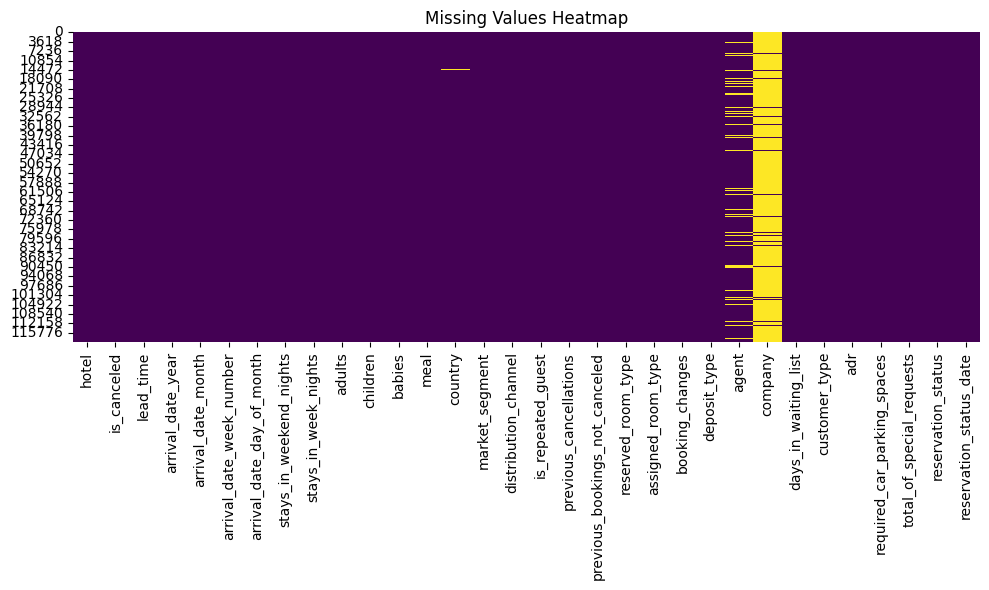

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

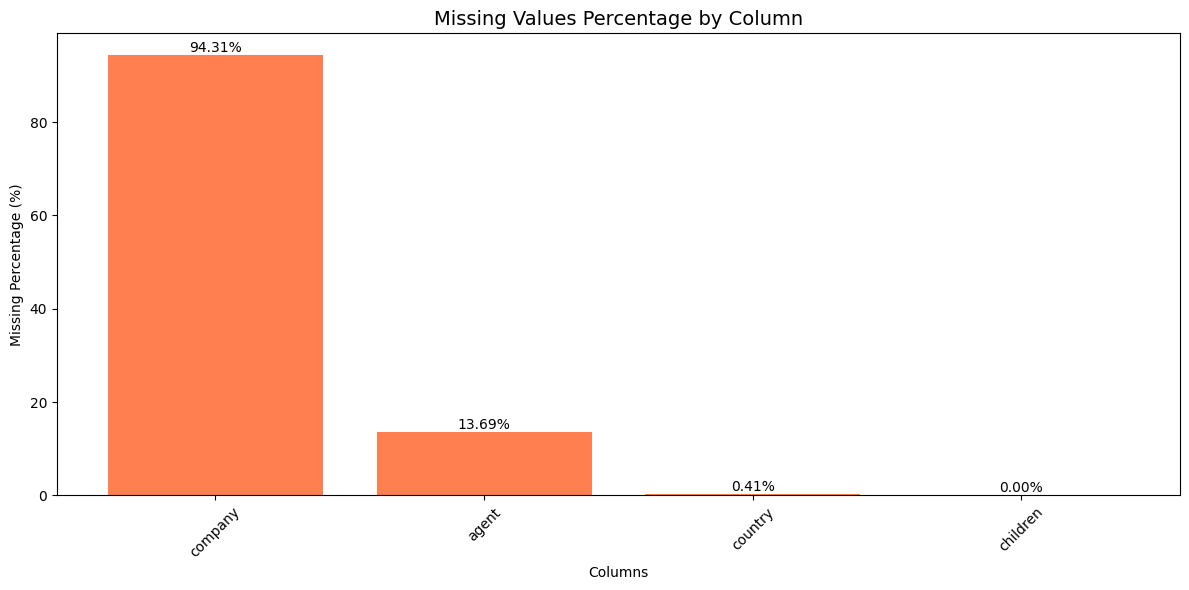

In [16]:
plt.figure(figsize=(12, 6))
bars = plt.bar(missing_df['Column'], missing_df['Missing_Percentage'], color='coral')
plt.title('Missing Values Percentage by Column', fontsize=14)
plt.xlabel('Columns')
plt.ylabel('Missing Percentage (%)')
plt.xticks(rotation=45)

# This is to add the value labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### It's Clearly obvious from the previous plots that the 'Company' column has the most amount of missing data in the dataset, about 94% of the column data is missing and the agent column has some missing values as well

## Detect Outliers

In [17]:
numeric_cols = df.select_dtypes(np.number).columns.tolist()
print(f"Numerical columns: {numeric_cols}")

Numerical columns: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


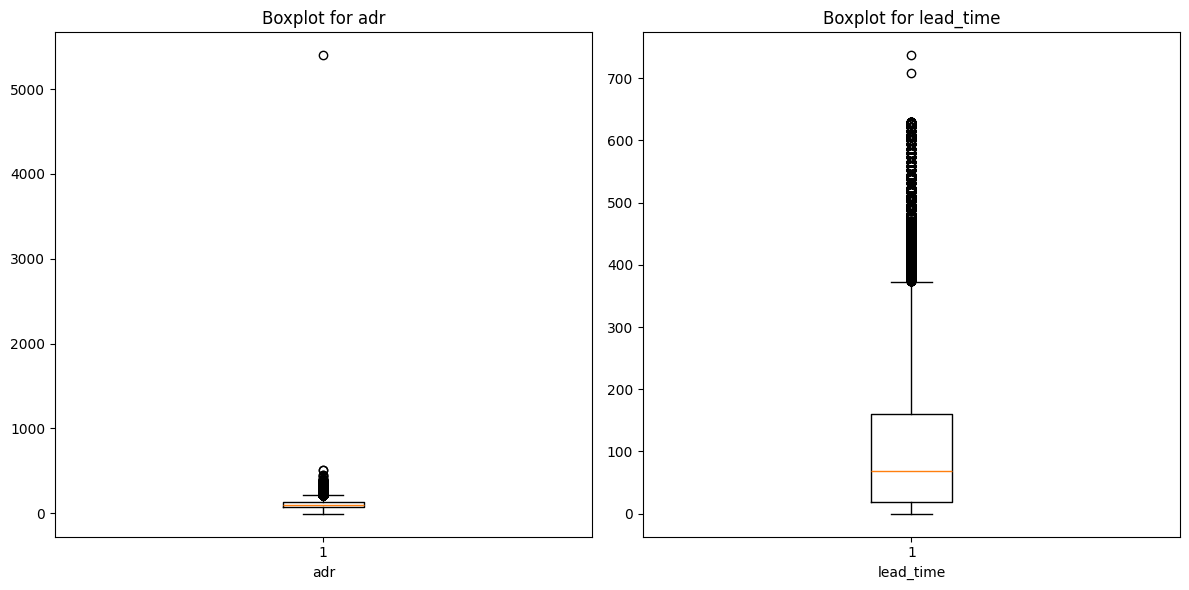

In [18]:
key_numeric_cols = ['adr', 'lead_time']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

outliers_summary = {}

for i, col in enumerate(key_numeric_cols):
    # Boxplot
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(f'Boxplot for {col}')
    axes[i].set_xlabel(col)

    # Calculate IQR-based outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_summary[col] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(df)) * 100,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

plt.tight_layout()
plt.show()

In [19]:
for col, info in outliers_summary.items():
    print(f"\n{col.upper()} Outliers:")
    print(f"  Count: {info['count']:,} ({info['percentage']:.2f}%)")
    print(f"  IQR Bounds: [{info['lower_bound']:.2f}, {info['upper_bound']:.2f}]")
    print(f"  Min Value: {df[col].min()}")
    print(f"  Max Value: {df[col].max()}")


ADR Outliers:
  Count: 3,793 (3.18%)
  IQR Bounds: [-15.77, 211.06]
  Min Value: -6.38
  Max Value: 5400.0

LEAD_TIME Outliers:
  Count: 3,005 (2.52%)
  IQR Bounds: [-195.00, 373.00]
  Min Value: 0
  Max Value: 737


### Overall Summary of the first step

1. DATASET OVERVIEW:
   - Total Records: 119,390
   - Total Features: 32
   - Target Variable: is_canceled

2. MISSING VALUES:
   - Found missing values in 4 columns
      
          company: 112,593 missing (94.31%)
      
          agent: 16,340 missing (13.69%)
      
          country: 488 missing (0.41%)
      
          children: 4 missing (0.00%)

3. OUTLIERS:
   - adr: 3,793 outliers (3.18%)
   - lead_time: 3,005 outliers (2.52%)

4. DATA TYPES:
   - Numerical columns: 20
   - Categorical columns: 12

# 2. Data Cleaning

In [22]:
df_clean = df.copy()

## Handle Missing Values

In [23]:
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

children         4
country        488
agent        16340
company     112593
dtype: int64


In [24]:
df_clean['company'] = df_clean['company'].fillna('None')
print("Filled 'company' missing values with 'None'")

Filled 'company' missing values with 'None'


In [25]:
df_clean['agent'] = df_clean['agent'].fillna('None')
print("Filled 'agent' missing values with 'None'")

Filled 'agent' missing values with 'None'


In [26]:
mode_country = df_clean['country'].mode()[0]
df_clean['country'] = df_clean['country'].fillna(mode_country)
print(f"Filled 'country' missing values with mode: {mode_country}")

Filled 'country' missing values with mode: PRT


In [27]:
median_children = df_clean['children'].median()
df_clean['children'] = df_clean['children'].fillna(median_children)
print(f"Filled 'children' missing values with median: {median_children}")

Filled 'children' missing values with median: 0.0


In [32]:
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

Series([], dtype: int64)


## Remove Duplicates

In [33]:
duplicates = df_clean.duplicated().sum()
print(duplicates)

32013


In [34]:
duplicate_rows = df_clean[df_clean.duplicated(keep=False)]
duplicate_rows.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,None,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,None,0,Transient,98.00,0,1,Check-Out,2015-07-03
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,None,0,Transient,84.67,0,1,Check-Out,2015-07-07
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,None,0,Transient,84.67,0,1,Check-Out,2015-07-07
39,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,None,0,Transient,137.00,0,1,Check-Out,2015-07-07


In [35]:
df_clean = df_clean.drop_duplicates()
print(f"Removed duplicate rows")

Removed duplicate rows


## Handle Outliers

In [37]:
outliers_above_212 = len(df_clean[df_clean['adr'] > 212])
print(f"Values above 212: {outliers_above_212} ({(outliers_above_212/len(df_clean)*100):.2f}%)")

Values above 212: 3540 (4.05%)


In [38]:
df_clean['adr'] = df_clean['adr'].clip(upper=212)
print(f"Capped {outliers_above_212} ADR values above 212 to 212")

Capped 3540 ADR values above 212 to 212


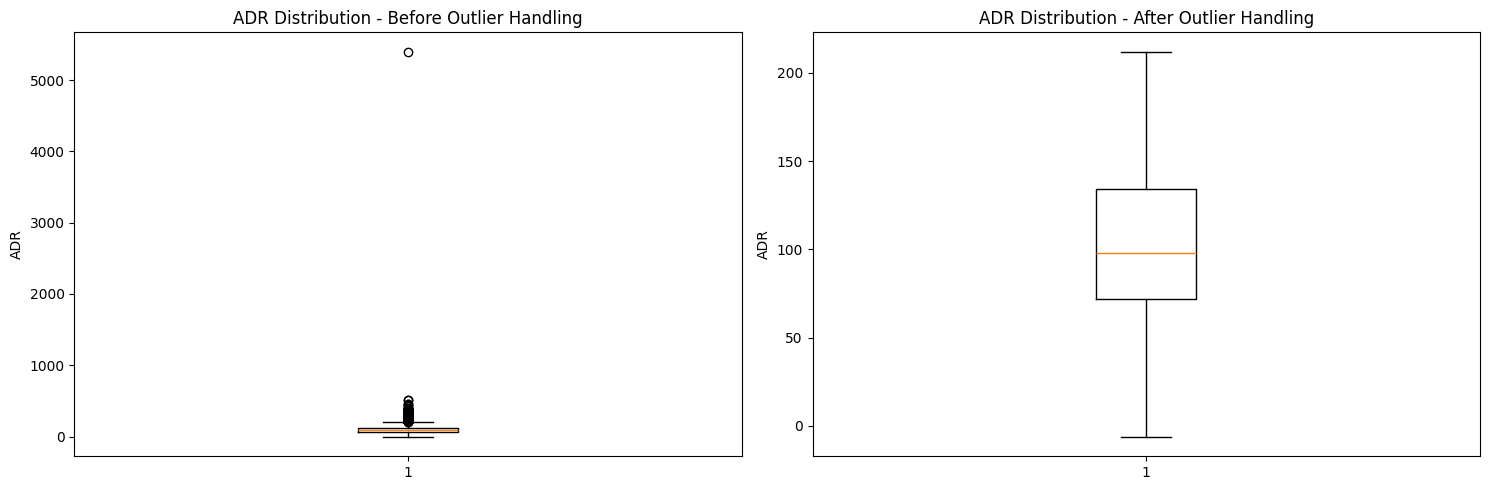

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Before (original data)
axes[0].boxplot(df['adr'].dropna())
axes[0].set_title('ADR Distribution - Before Outlier Handling')
axes[0].set_ylabel('ADR')

# After (cleaned data)
axes[1].boxplot(df_clean['adr'].dropna())
axes[1].set_title('ADR Distribution - After Outlier Handling')
axes[1].set_ylabel('ADR')

plt.tight_layout()
plt.show()

## Fix Data Types

In [40]:
df_clean['reservation_status_date'] = pd.to_datetime(df_clean['reservation_status_date'])
print("Converted reservation_status_date to datetime")

Converted reservation_status_date to datetime


In [41]:
categorical_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel',
                   'reserved_room_type', 'assigned_room_type', 'deposit_type',
                   'customer_type', 'country']
for col in categorical_cols:
    df_clean[col] = df_clean[col].astype(str)

In [43]:
print("Ensured categorical columns are string type")

Ensured categorical columns are string type


In [44]:
numerical_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                  'adults', 'children', 'babies', 'adr']

In [45]:
for col in numerical_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

In [46]:
print("Ensured numerical columns are numeric type")

Ensured numerical columns are numeric type


### Overall Summary Of the second step
Original dataset shape: (119390, 32)

Cleaned dataset shape: (87377, 32)

Rows removed: 32,013

Missing values: 0

Duplicate Values: 0

# 3. Feature Engineering & Preprocessing

In [48]:
df_features = df_clean.copy()

## Create New Features

In [49]:
df_features['total_guests'] = (df_features['adults'] +
                              df_features['children'] +
                              df_features['babies'])
print("Created feature: total_guests")

Created feature: total_guests


In [50]:
df_features['total_nights'] = (df_features['stays_in_weekend_nights'] +
                              df_features['stays_in_week_nights'])
print("Created feature: total_nights")

Created feature: total_nights


In [51]:
df_features['is_family'] = ((df_features['children'] > 0) |
                           (df_features['babies'] > 0))
print("Created feature: is_family")

Created feature: is_family


In [58]:
print("New Features Summary:")
print(f"(total_guests) Min: {df_features['total_guests'].min()}, Max: {df_features['total_guests'].max()}, Mean: {df_features['total_guests'].mean():.2f}")
print(f"(total_nights) Min: {df_features['total_nights'].min()}, Max: {df_features['total_nights'].max()}, Mean: {df_features['total_nights'].mean():.2f}")
print(f"(is_family) Family bookings: {df_features['is_family'].sum():}, Mean: {df_features['is_family'].mean():.2f}")

New Features Summary:
(total_guests) Min: 0.0, Max: 55.0, Mean: 2.03
(total_nights) Min: 0, Max: 69, Mean: 3.63
(is_family) Family bookings: 9103, Mean: 0.10


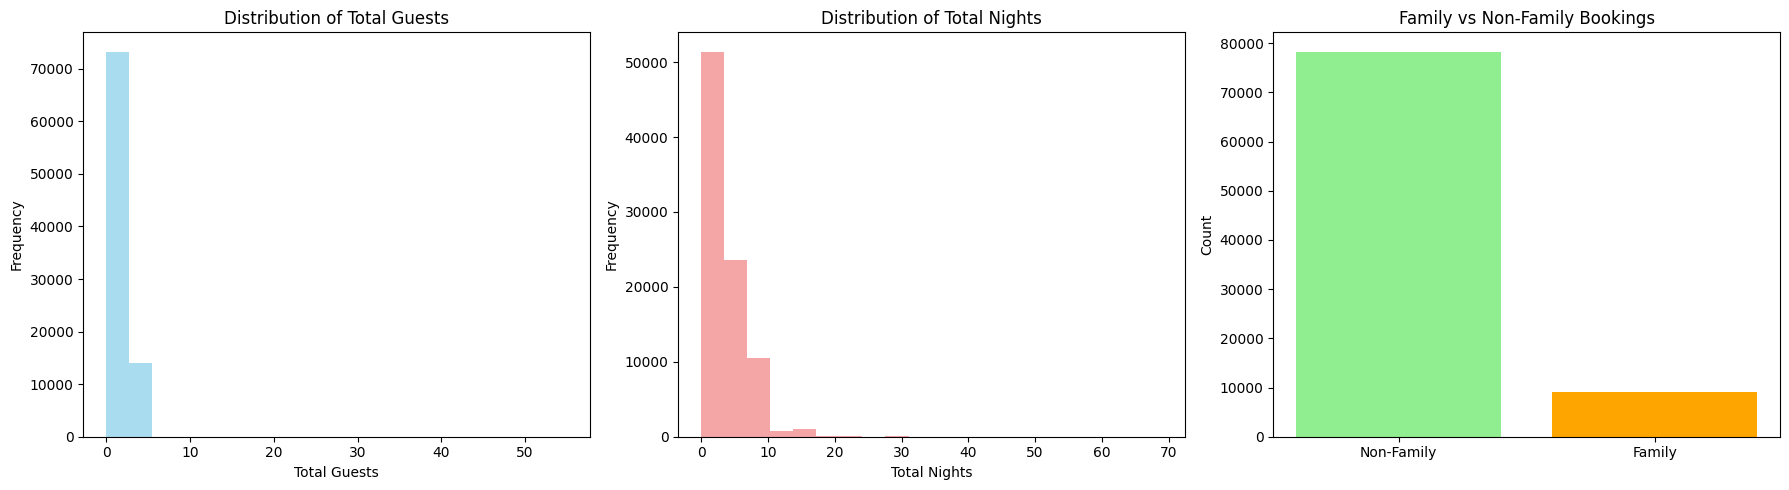

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Total guests distribution
axes[0].hist(df_features['total_guests'], bins=20, alpha=0.7, color='skyblue')
axes[0].set_title('Distribution of Total Guests')
axes[0].set_xlabel('Total Guests')
axes[0].set_ylabel('Frequency')

# Total nights distribution
axes[1].hist(df_features['total_nights'], bins=20, alpha=0.7, color='lightcoral')
axes[1].set_title('Distribution of Total Nights')
axes[1].set_xlabel('Total Nights')
axes[1].set_ylabel('Frequency')

# Family vs Non-family
family_counts = df_features['is_family'].value_counts()
axes[2].bar(['Non-Family', 'Family'], family_counts, color=['lightgreen', 'orange'])
axes[2].set_title('Family vs Non-Family Bookings')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Encode Categorical Variables

In [62]:
categorical_cols = df_features.select_dtypes('object').columns.tolist()

In [64]:
low_cardinality_cols = []
high_cardinality_cols = []

for col in categorical_cols:
    unique_values = df_features[col].nunique()
    print(f"{col}: {unique_values} unique values")

    if unique_values <= 10:
        low_cardinality_cols.append(col)
    else:
        high_cardinality_cols.append(col)

print(f"\nLow cardinality columns (≤10 unique): {low_cardinality_cols}")
print(f"High cardinality columns (>10 unique): {high_cardinality_cols}")

hotel: 2 unique values
arrival_date_month: 12 unique values
meal: 5 unique values
country: 177 unique values
market_segment: 8 unique values
distribution_channel: 5 unique values
reserved_room_type: 10 unique values
assigned_room_type: 12 unique values
deposit_type: 3 unique values
agent: 334 unique values
company: 353 unique values
customer_type: 4 unique values
reservation_status: 3 unique values

Low cardinality columns (≤10 unique): ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'reservation_status']
High cardinality columns (>10 unique): ['arrival_date_month', 'country', 'assigned_room_type', 'agent', 'company']


### One-Hot Encoding for Low-Cardinality Categories

In [65]:
original_shape = df_features.shape

df_encoded = pd.get_dummies(df_features,
                            columns=low_cardinality_cols,
                            prefix=low_cardinality_cols,
                            drop_first=True)

df_features = df_encoded

print(f"Shape before encoding: {original_shape}")
print(f"Shape after encoding: {df_features.shape}")
print(f"New columns created: {df_features.shape[1] - original_shape[1]}")

Shape before encoding: (87377, 35)
Shape after encoding: (87377, 59)
New columns created: 24


### Handle High-Cardinality Variables

In [67]:
label_encoders = {}

for col in high_cardinality_cols:
    print(f"\nProcessing {col}:")

    # Show value counts before processing
    value_counts = df_features[col].value_counts()
    print(f"Original unique values: {len(value_counts)}")

    # Group infrequent categories into "Other"
    frequent_categories = value_counts[value_counts >= 100].index
    print(f"Categories with ≥100 occurrences: {len(frequent_categories)}")

    df_features[col] = df_features[col].apply(
        lambda x: x if x in frequent_categories else 'Other'
    )

    # Apply Label Encoding
    le = LabelEncoder()
    df_features[col] = le.fit_transform(df_features[col].astype(str))
    label_encoders[col] = le

    print(f"Final unique values after encoding: {df_features[col].nunique()}")

print(f"\nApplied label encoding to {len(high_cardinality_cols)} high-cardinality columns")


Processing arrival_date_month:
Original unique values: 12
Categories with ≥100 occurrences: 12
Final unique values after encoding: 12

Processing country:
Original unique values: 177
Categories with ≥100 occurrences: 35
Final unique values after encoding: 36

Processing assigned_room_type:
Original unique values: 12
Categories with ≥100 occurrences: 10
Final unique values after encoding: 11

Processing agent:
Original unique values: 334
Categories with ≥100 occurrences: 59
Final unique values after encoding: 60

Processing company:
Original unique values: 353
Categories with ≥100 occurrences: 9
Final unique values after encoding: 10

Applied label encoding to 5 high-cardinality columns


## Remove Data Leakage

In [71]:
leakage_columns = ['reservation_status_date']

In [72]:
df_features = df_features.drop(columns=leakage_columns)
print(f"Removed columns: {leakage_columns}")

Removed columns: ['reservation_status_date']


In [73]:
print(f"Dataset shape after removing leakage: {df_features.shape}")

Dataset shape after removing leakage: (87377, 58)


## Final Data Preparation

In [74]:
target_col = 'is_canceled'
print(f"Target distribution: {df_features[target_col].value_counts().to_dict()}")

Target distribution: {0: 63353, 1: 24024}


### Feature Scaling

In [75]:
X = df_features.drop(columns=[target_col])
y = df_features[target_col]

In [77]:
numerical_columns = X.select_dtypes(np.number).columns.tolist()

In [79]:
scaler = StandardScaler()
X_scaled = X.copy()

X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols])
print("Applied StandardScaler to numerical features")

# Scaling effect
print(f"\nScaling effect example (first numerical column: {numerical_cols[0]}):")
print(f"(Before scaling) Mean: {X[numerical_cols[0]].mean():.3f}, Std: {X[numerical_cols[0]].std():.3f}")
print(f"(After scaling) Mean: {X_scaled[numerical_cols[0]].mean():.3f}, Std: {X_scaled[numerical_cols[0]].std():.3f}")

Applied StandardScaler to numerical features

Scaling effect example (first numerical column: lead_time):
(Before scaling) Mean: 79.906, Std: 86.056
(After scaling) Mean: -0.000, Std: 1.000


### Train-Test Split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Features: {X_train.shape[1]}")

Training set: (69901, 57)
Test set: (17476, 57)
Features: 57


# Data Transformation Summary

In [82]:
print(f"Original dataset shape: {df.shape}")
print(f"After cleaning: {df_clean.shape}")
print(f"After feature engineering: {df_features.shape}")
print(f"Final training features: {X_train.shape[1]}")

Original dataset shape: (119390, 32)
After cleaning: (87377, 32)
After feature engineering: (87377, 58)
Final training features: 57
